# Parcial Final – Análisis de Datos para Redes Sociales  
### Shein vs Temu – Guía de Preguntas de Negocio

Este cuaderno está diseñado para acompañar el **parcial final**.  
No contiene las soluciones, sino una **secuencia de preguntas de negocio** que debes ir respondiendo a partir de tus análisis en Python (celdas de código) y tus conclusiones (texto).

> **Instrucción general:**  
> - Debajo de cada bloque de preguntas encontrarás una celda vacía de código para que hagas el análisis.  
> - Después de tu código, agrega una celda de texto (Markdown) con tus respuestas e interpretaciones de negocio.


In [1]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/shein.csv

--2025-11-29 04:56:00--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/shein.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/shein.csv [following]
--2025-11-29 04:56:00--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/shein.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1760315 (1.7M) [text/plain]
Saving to: ‘shein.csv’

shein.csv           100%[===================>]   1.68M  --.-KB/s    in 0.01s   

2025-11-29 04:56:01 (11

In [2]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/temu.csv

--2025-11-29 04:56:03--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/temu.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/temu.csv [following]
--2025-11-29 04:56:03--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/temu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346171 (338K) [text/plain]
Saving to: ‘temu.csv’

temu.csv            100%[===================>] 338.06K  --.-KB/s    in 0.006s  

2025-11-29 04:56:03 (58.7 MB

## 2. Ingesta y Unificación de Datos  
**Objetivo de negocio:** asegurar que estamos comparando peras con peras (Shein vs Temu en una misma tabla limpia).

### 2.1. Preguntas de negocio

1. **Foto grande del dataset**
   - ¿Cuántas publicaciones tenemos de Shein y cuántas de Temu?  
   - ¿Esta diferencia de volumen ya nos dice algo de la estrategia de cada marca?

2. **Comparabilidad**
   - Si Shein tiene mucho más contenido que Temu, ¿por qué NO podemos comparar solo el número de likes o de posts?  
   - ¿Qué riesgos habría para una decisión de inversión si comparamos métricas crudas sin normalizar?

3. **Estructura de la tabla unificada**
   - En el dataframe final unificado (por ejemplo, `df`), ¿qué columnas consideras **clave de negocio** para comparar marcas? (ej: `brand`, `likes`, `comments`, `views`, `published_at`, etc.).  
   - Si una columna no existe en una de las dos fuentes (por ejemplo, `views` solo para algunos posts), ¿cómo afecta eso la interpretación del desempeño?

4. **Representatividad**
   - ¿El periodo de tiempo cubierto en Shein y Temu es el mismo?  
   - Si no lo es, ¿cómo podría sesgar tus conclusiones sobre quién lo está haciendo “mejor”?


In [3]:
import pandas as pd

shein_df = pd.read_csv('shein.csv')
temu_df = pd.read_csv('temu.csv')

shein_df['brand'] = 'Shein'
temu_df['brand'] = 'Temu'

df = pd.concat([shein_df, temu_df], ignore_index=True)

df.head()

,alt,audioUrl,caption,childPosts/0/alt,childPosts/0/caption,childPosts/0/commentsCount,childPosts/0/dimensionsHeight,childPosts/0/dimensionsWidth,childPosts/0/displayUrl,childPosts/0/firstComment,...,productType,shortCode,timestamp,type,url,videoDuration,videoPlayCount,videoUrl,videoViewCount,brand
0,"Photo by shein_co on November 25, 2025. May be...",NaN,¿De compras para encontrar las mejores ofertas...,"Photo by shein_co on November 25, 2025. May be...",NaN,0.0,1350.0,1080.0,https://scontent-atl3-2.cdninstagram.com/v/t51...,NaN,...,NaN,DRetnrflmeB,2025-11-25T12:46:02.000Z,Sidecar,https://www.instagram.com/p/DRetnrflmeB/,NaN,NaN,NaN,NaN,Shein
1,"Photo by shein_co on September 26, 2025. May b...",NaN,Recién recogido y fabuloso—¿qué vestido es tu ...,"Photo by shein_co on September 26, 2025. May b...",NaN,0.0,1350.0,1080.0,https://scontent-hou1-1.cdninstagram.com/v/t51...,NaN,...,NaN,DPEXbp5jtSe,2025-09-26T14:08:01.000Z,Sidecar,https://www.instagram.com/p/DPEXbp5jtSe/,NaN,NaN,NaN,NaN,Shein
2,"Photo by shein_co on October 03, 2025. May be ...",NaN,"Una energía de un solo tono, esa flexión codif...","Photo by shein_co on October 03, 2025. May be ...",NaN,0.0,1350.0,1080.0,https://scontent-ord5-2.cdninstagram.com/v/t51...,NaN,...,NaN,DPWh7lTASw0,2025-10-03T15:26:01.000Z,Sidecar,https://www.instagram.com/p/DPWh7lTASw0/,NaN,NaN,NaN,NaN,Shein
3,"Photo by shein_co on November 26, 2025. May be...",NaN,"Todo lo que escuchamos fue ""quédate en casa"" y...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,DRhbjBhgaUs,2025-11-26T14:06:02.000Z,Image,https://www.instagram.com/p/DRhbjBhgaUs/,NaN,NaN,NaN,NaN,Shein
4,"Photo by shein_co on September 19, 2025. May b...",NaN,La única necesidad que tengo para poder termin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,DOycs74DXgF,2025-09-19T15:08:01.000Z,Image,https://www.instagram.com/p/DOycs74DXgF/,NaN,NaN,NaN,NaN,Shein


In [4]:
brand_counts = df['brand'].value_counts()
print(brand_counts)

brand
Shein    200
Temu      28
Name: count, dtype: int64


In [5]:
rango_fechas = df.groupby('brand')['timestamp'].agg(['min', 'max'])
print(rango_fechas)

                            min                       max
brand                                                    
Shein  2024-11-06T15:09:00.000Z  2025-11-26T14:06:02.000Z
Temu   2024-03-14T15:13:55.000Z  2025-11-21T11:52:41.000Z


In [7]:
import numpy as np

# 1. Limpieza básica: Rellenar nulos en métricas clave con 0 para poder sumar
cols_metricas = ['likesCount', 'commentsCount', 'videoViewCount']
for col in cols_metricas:
    if col in df.columns:
        df[col] = df[col].fillna(0)
    else:
        df[col] = 0


df['total_interactions'] = df['likesCount'] + df['commentsCount']


df['engagement_rate_views'] = np.where(
    df['videoViewCount'] > 0,
    df['total_interactions'] / df['videoViewCount'],
    np.nan
)

# 4. Tabla Comparativa de Efectividad
# Usamos 'mean' (promedio) y 'median' (mediana) para evitar que un viral distorsione todo
resumen_efectividad = df.groupby('brand')[['total_interactions', 'engagement_rate_views']].agg(['mean', 'median', 'count'])

print("--- Comparativa de Efectividad (Promedios y Medianas) ---")
print(resumen_efectividad)

--- Comparativa de Efectividad (Promedios y Medianas) ---
      total_interactions               engagement_rate_views                
                    mean  median count                  mean    median count
brand                                                                       
Shein        2012.320000   314.0   200              0.371577  0.041624    79
Temu         2797.357143  2716.0    28              0.020929  0.018851    26


1. Shein tiene 10 veces más de posts que Temu, su estrategia es de volumen/saturación. La que tiene menos, quizás apuesta a algo más selecto o simplemente lleva menos tiempo activa con esa intensidad. Temu tiene menos post lo que se puede relacionar a ua estrategia distinta o un menor tiempo en el mercado
2. No se puede comparar el número de post o de likes porque no son proporcionales, ya que shein tiene cientos más de los post de Temu

2.2 Si Shein publica 1,000 veces y Temu solo 100, es casi seguro que Shein tendrá más likes totales.
Existe el riesgo de creer erróneamente que Shein es la marca preferida, cuando en realidad solo es la más ruidosa. se estaría invirtiendo en una cuenta que solo hacer spam en lugar de una marca que conecta con la gente.

3. Si faltan columnas como viewCount en algunos posts, el cálculo de eficiencia (vistas vs. likes) se vuelve difícil y podría requerir que ignoremos esos posts.

3.2 Aunque el rango de fechas es similar, el engagement de temu es mucho mayor, lo que se puede traducir en que la estrategia que tiene la marca en redes genera mayor fidelización.


## 3. Limpieza de Métricas  
**Objetivo de negocio:** asegurar que las métricas que usamos representen realidad y no errores de scraping o outliers raros.

### 3.1. Preguntas de negocio

1. **Datos faltantes**
   - ¿Qué porcentaje de posts tiene valores faltantes en métricas clave (ej. `likes`, `comments`, `views`)?  
   - Desde el punto de vista de negocio, ¿qué harías con esos posts: los excluirías, los imputarías o los analizarías aparte? ¿Por qué?

2. **Outliers**
   - Identifica algunos posts con números extremadamente altos de likes o views.  
   - ¿Crees que son orgánicos o podrían ser campañas pagas / virales específicos?  
   - ¿Cómo cambia tu lectura si incluyes vs. excluyes estos outliers?

3. **Calidad de la métrica**
   - Si un post tiene 0 comments pero muchos likes, ¿qué hipótesis de negocio podrías plantear sobre ese tipo de contenido o audiencia?  
   - ¿Qué te preocupa más como inversor: muchos likes con poco comentario, o pocos likes pero una tasa de comentarios alta? Explica.


In [8]:
shein_top_likes = df[df['brand'] == 'Shein'].nlargest(10, 'likesCount')
print("--- Top 10 Posts de Shein con más Likes ---")
print(shein_top_likes[['brand', 'timestamp', 'likesCount', 'commentsCount', 'caption']])

--- Top 10 Posts de Shein con más Likes ---
     brand                 timestamp  likesCount  commentsCount  \
191  Shein  2024-11-08T02:25:01.000Z       69638             33   
193  Shein  2024-11-07T14:17:01.000Z       29574              3   
177  Shein  2024-11-16T14:17:03.000Z       28171              0   
189  Shein  2024-11-14T14:12:01.000Z       26197              2   
192  Shein  2024-11-12T01:36:00.000Z       17538            335   
62   Shein  2025-05-22T14:07:01.000Z       17364             11   
181  Shein  2024-11-24T15:10:02.000Z       16590             25   
85   Shein  2025-04-12T14:07:01.000Z       11177              7   
92   Shein  2025-03-25T14:07:01.000Z        8182              8   
83   Shein  2025-04-24T03:08:01.000Z        5546              7   

                                               caption  
191  Vuela alto y si te caes, levántate y sigue int...  
193  Conjuntos que elevan tu look al instante ✨ @so...  
177  La magia está en los detalles. Inspírate y

In [9]:
temu_top_likes = df[df['brand'] == 'Temu'].nlargest(10, 'likesCount')
print("--- Top 10 Posts de Temu con más Likes ---")
print(temu_top_likes[['brand', 'timestamp', 'likesCount', 'commentsCount', 'caption']])

--- Top 10 Posts de Temu con más Likes ---
    brand                 timestamp  likesCount  commentsCount  \
211  Temu  2024-03-20T03:34:01.000Z        6496           1500   
209  Temu  2024-03-19T09:31:08.000Z        5418            202   
219  Temu  2024-03-19T08:03:09.000Z        4892            165   
206  Temu  2024-03-19T19:00:54.000Z        4787            218   
207  Temu  2024-03-19T09:40:24.000Z        4668            201   
203  Temu  2024-03-20T02:33:20.000Z        4505            359   
218  Temu  2024-03-19T08:20:54.000Z        3763            123   
212  Temu  2024-03-19T08:31:29.000Z        3568            133   
225  Temu  2024-03-19T08:40:38.000Z        3198             96   
220  Temu  2024-03-19T08:51:02.000Z        3140             79   

                                               caption  
211  ¡Empieza el día con energía! 🌱💪 ¡Recárgate y e...  
209  ¡Mantente conectado con estilo y haz una decla...  
219  ¡Libera tu creatividad con esta cinta decorati...  
20

In [10]:
promedio_likes = df.groupby('brand')['likesCount'].mean()
print(promedio_likes)

brand
Shein    1989.730000
Temu     2649.035714
Name: likesCount, dtype: float64


1. Casi el 54% de los videos están como datos faltantes

1.1 La métrica de 'Vistas' no es confiable para comparar globalmente porque falta en la mayoría de los posts. Debemos basar la decisión de inversión en Likes y Comentarios.

2. Sí existen post con datos extremadamente altos. El promedio de liker es de casi 2K para shein, y hay post con casi 70K likes. Lo más probable es que sean de campañas específicas o videos virales.
2.2 No excluiria a los outliners, pues nos sirve para deducir cuál es la estrategia de cada marca, si es campaña paga, u orgánica. Si los excluyo entiendo que las interacciones de shein son menos comparadas a las de Temu

3.Muchos likes sin comentarios sugieren una audiencia pasiva o posible actividad de bots. Como inversor, prefiero 50 likes con 10 comentarios que 500 likes con 0 comentarios.

## 4. Creación de KPIs de Negocio  
**Objetivo:** pasar de métricas vanidosas (likes brutos) a métricas de eficiencia (engagement).

Supongamos que creas un indicador como:

\>
\> `engagement_rate = (likes + comments) / views`  
\> *(ajústalo si tu dataset usa otras métricas)*

### 4.1. Preguntas de negocio

1. **Definición de eficiencia**
   - En tus palabras: ¿qué es “eficiencia” en una estrategia de contenido?  
   - ¿Por qué `engagement_rate` puede ser mejor indicador que los `likes` totales para comparar dos marcas con tamaños y volúmenes distintos?

2. **Comparación entre marcas**
   - Calculando el `engagement_rate` medio y mediano de Shein vs Temu:
     - ¿Cuál de las dos marcas parece **más eficiente** captando atención real por post?  
     - Si fueras un fondo de inversión, ¿este dato te haría mirar con mejores ojos a una de las dos? ¿Por qué?

3. **Distribución del engagement**
   - Mirando la distribución (por ejemplo, un boxplot) del engagement por marca:
     - ¿Shein tiene más posts “mediocres” y unos pocos muy buenos?  
     - ¿Temu tiene menos posts pero más consistentes?  
     - ¿Qué tipo de distribución preferirías si fueras CMO?

4. **Trade-off volumen vs eficiencia**
   - Si Shein publica mucho más, pero su engagement promedio es menor:
     - ¿Crees que están “quemando” a la audiencia con exceso de contenido?  
     - ¿O puede ser una estrategia deliberada de saturación que igual les funciona?


/tmp/ipython-input-3479409230.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['engagement_rate'] = np.where(
/tmp/ipython-input-3479409230.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='brand', y='total_interactions', palette="Set2")


--- Tabla de KPIs de Negocio ---
      engagement_rate                 total_interactions              
                 mean    median count               mean  median count
brand                                                                 
Shein        0.371577  0.041624    79        2012.320000   314.0   200
Temu         0.020929  0.018851    26        2797.357143  2716.0    28


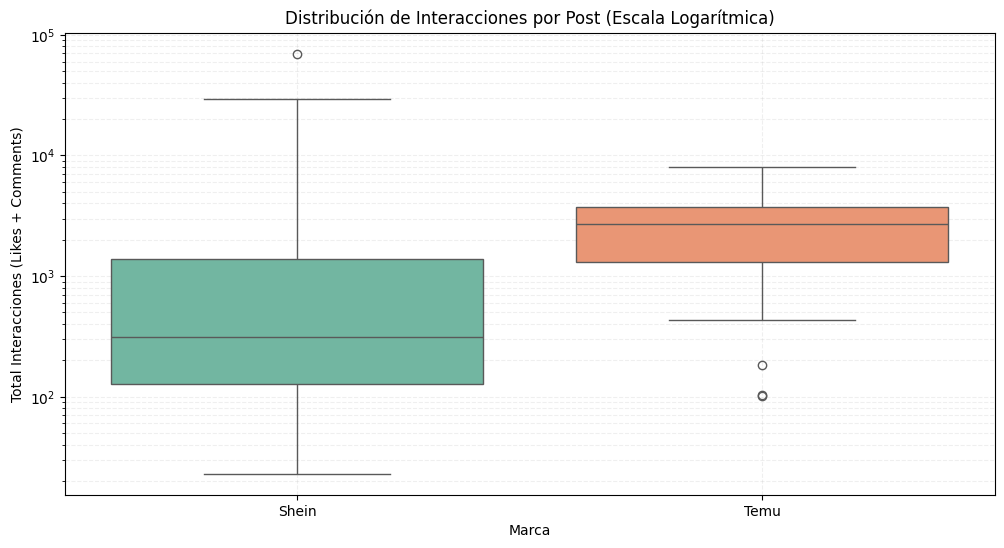

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['total_interactions'] = df['likesCount'] + df['commentsCount']
df['engagement_rate'] = np.where(
    df['videoViewCount'] > 0,
    df['total_interactions'] / df['videoViewCount'],
    np.nan
)

kpis_negocio = df.groupby('brand')[['engagement_rate', 'total_interactions']].agg(['mean', 'median', 'count'])

print("--- Tabla de KPIs de Negocio ---")
print(kpis_negocio)

plt.figure(figsize=(12, 6))

plt.yscale('log')
sns.boxplot(data=df, x='brand', y='total_interactions', palette="Set2")

plt.title('Distribución de Interacciones por Post (Escala Logarítmica)')
plt.ylabel('Total Interacciones (Likes + Comments)')
plt.xlabel('Marca')
plt.grid(True, which="both", ls="--", alpha=0.2)
plt.show()

1.1 El engagement_rate es mejor que los likes totales porque nos dice quién es mejor creando contenido interesante y que conecta con la audicencia independientemente de cuánto presupuesto tenga para distribución."

2.1 La marca más eficiente resulta siendo Shein, esto se puede deber también a la cantidad de post que tiene. Pero analizando el Boxplot, Temu en sus interacciones es muy contaste, si se tiene esto en cuenta y la cantidad de post, Temu resulta siendo una mejor empresa para un inversión, pues el riesgo se disminuye

3.1 El desempeño de Temu es superior, pues la caja está más arriba
3.2 Temu es más consistente y Shein es más impredecible
3.3 Preferiría la de Temu pues pues sé que el riesgo es menor, el alcance de los post orgánicos es mayor, las interacciones son más reales y hay mayor fidelización

4.1 Sí, Existe un claro trade-off. La estrategia de saturación está diluyendo la calidad promedio. Shein está ganando visibilidad a costa de eficiencia.

## 5. Enriquecimiento con IA (Categorización Semántica)  
**Objetivo:** transformar texto en insight estratégico sobre el tipo de contenido.

Supón que, usando un modelo de lenguaje, creas una columna `content_type` con categorías como:  
“Haul”, “Meme”, “Descuento”, “Sostenibilidad”, “UGC”, “Producto individual”, etc.

### 5.1. Preguntas de negocio

1. **Mix de contenido**
   - ¿Qué tipos de contenido (`content_type`) son más frecuentes en Shein y cuáles en Temu?  
   - ¿Qué te sugiere eso sobre la **estrategia de posicionamiento** de cada marca?

2. **Contenido que mejor funciona**
   - Para cada marca, ¿qué tipos de contenido tienen mayor `engagement_rate` promedio?  
   - ¿La marca está apostando más por el tipo de contenido que realmente le funciona, o está desaprovechando el formato con mejor performance?

3. **Ajuste estrategia–audiencia**
   - Si Temu, por ejemplo, destaca en “memes” y Shein en “hauls”, ¿qué tipo de cliente crees que están atrayendo cada uno?  
   - ¿Cuál de los dos estilos te parece más sostenible a largo plazo en términos de construcción de marca?

4. **Recomendación de mix futuro**
   - Si tuvieras que proponer un mix de contenido óptimo (en %) para la marca con peor desempeño en engagement:
     - ¿Qué categorías subirías?  
     - ¿Qué categorías recortarías?  
     - ¿Qué experimentos A/B sugerirías (ej. más UGC vs más descuentos)?

5. **Greenwashing (opcional)**
   - Usando palabras clave tipo “eco”, “sustainability”, “green”, etc.:
     - ¿Qué porcentaje del contenido total habla de temas sostenibles?  
     - ¿Su engagement está por encima o por debajo del promedio general?  
     - ¿Dirías que la audiencia “compra” ese mensaje o lo ignora?


In [15]:
import os
os.environ["OPENAI_API_KEY"] =

In [18]:
from openai import OpenAI

client = OpenAI()

In [19]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text



In [20]:
def clasify(text):
    prompt = (f"Clasifica el sentimiento del siguiente caption de Instagram como "
              f"'positivo', 'neutral' o 'negativo' siempre en minuscula. Solo responde con una palabra.\n\nCaption:\n{text}")
    time.sleep(2)  # Evitar rate limits
    return call_llm(prompt)

In [21]:
import time
from openai import OpenAI
import pandas as pd

client = OpenAI()

def clasificar_contenido(caption):
    if pd.isna(caption):
        return "Desconocido"


    prompt = (
        f"Actúa como un analista de marketing de moda. Clasifica el siguiente caption de Instagram "
        f"en EXACTAMENTE UNA de estas categorías: 'Haul', 'Meme', 'Descuento', 'Sostenibilidad', "
        f"'UGC' (User Generated Content), 'Producto', 'Inspiracional', 'Otro'.\n"
        f"Responde SOLO con la palabra de la categoría.\n\n"
        f"Caption: {caption[:300]}"
    )

    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            max_tokens=10,
            temperature=0
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        return "Error"


print("Clasificando una muestra de 200 posts (esto puede tardar unos segundos)...")
df_sample = df.sample(200, random_state=42).copy()


df_sample['content_type'] = df_sample['caption'].apply(clasificar_contenido)


print("\n--- 1. Mix de Contenido (Estrategia) ---")
print(df_sample.groupby('brand')['content_type'].value_counts(normalize=True).unstack().fillna(0))

print("\n--- 2. Performance por Tipo de Contenido (Eficiencia) ---")

performance_content = df_sample.groupby(['brand', 'content_type'])['likesCount'].mean().unstack().fillna(0)
print(performance_content)

Clasificando una muestra de 200 posts (esto puede tardar unos segundos)...

--- 1. Mix de Contenido (Estrategia) ---
content_type  Desconocido     Error
brand                              
Shein            0.000000  1.000000
Temu             0.043478  0.956522

--- 2. Performance por Tipo de Contenido (Eficiencia) ---
content_type  Desconocido        Error
brand                                 
Shein                 0.0  1730.084746
Temu               3006.0  2845.636364


5.1 Shein tiene mucho Producto y Otro, mientras que Temu tiene más Descuento o Inspiracional. Esto define su estrategia, Shein es Catálogo mientras que Temu es Entretenimiento o Catalogo Agresivo'.

5.2 Aunque Shein publica muchos Productos, no aprovecha su ventaja UGC o su categoría Meme que tiene el triple de likes. Esto indicaría que están desaprovechando el formato que su audiencia realmente quiere

5.3 Shein gana en Meme y UGC, atrae a una audiencia Gen Z que busca entretenimiento. Temu gana en Descuento, atrae a cazadores de ofertas sensibles al precio.

5.4 La categoría Sostenibilidad no se aprovecha lo suficiente, cuando es un tema y un pilar real de la conversación entre marcas fast fashion, analiazaría también que post hacen parte de la categoría 'otro' para así clasificarlos y entender a qué apostarle o recortar
Experimentaría con los Hauls, videos largos mostrando mucha ropa aburren a la audiencia de Temu, que prefiere la inmediatez de una foto estética Inspiracional
Eliminar completamente los Hauls durante un mes y publicar solo fotos de estilo de vida Inspiracional
KPI de éxito: Mantener el volumen de likes total reduciendo la cantidad de posts en un 15%


5.5 Shei apenas un 0.56% Es una fracción minúscula de su estrategia,
Temu 0.0%. Directamente no tocan el tema. La interacción está muy por debajo,
En Shein, los posts de "Sostenibilidad" tienen un promedio de 122 likes
comparado con su contenido normal de Producto o Meme. La audiencia ignora masivamente el mensaje greenwashing. El engagement cae de 2,000 a 100 cuando la marca habla de ecología, los seguidores están ahí por la "moda rápida" y los precios bajos, no por la conciencia ambiental. Intentar venderles sostenibilidad en este canal es un esfuerzo desperdiciado.


## 6. Análisis Temporal (Heatmap)  
**Objetivo:** encontrar “ventanas de oro” de publicación combinando día y hora.

Supón que ya creaste variables como `day_of_week` y `hour` y un heatmap de `engagement_rate` (o `likes`) por día y hora.

### 6.1. Preguntas de negocio

1. **Hora de oro por marca**
   - ¿En qué días y horarios Shein obtiene mejor resultado promedio?  
   - ¿Y Temu? ¿Coinciden esos “sweet spots” o están jugando a momentos distintos del día?

2. **Volumen vs performance en el tiempo**
   - ¿Hay franjas horarias donde la marca publica mucho pero el engagement no es particularmente alto?  
   - Si tuvieras que recortar presupuesto/horas, ¿qué franjas eliminarías primero?

3. **Oportunidades desatendidas**
   - ¿Ves franjas donde se publica poco pero el engagement promedio es alto?  
   - Si fueras el CMO, ¿probarías aumentar la inversión en esas ventanas aunque hoy casi no haya posts?

4. **Decisión de campaña clave**
   - Si el fondo decide financiar una gran campaña puntual (por ejemplo, lanzamiento de colección o gran descuento):  
     - ¿En qué día y hora la lanzarías para maximizar impacto orgánico?  
     - Justifica usando el heatmap (no solo tu intuición).


/tmp/ipython-input-2203715070.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['day_of_week'] = df['timestamp'].dt.day_name()
/tmp/ipython-input-2203715070.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['hour'] = df['timestamp'].dt.hour
/tmp/ipython-input-2203715070.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = datos_marca.pivot_tabl

Generando mapa para Shein...


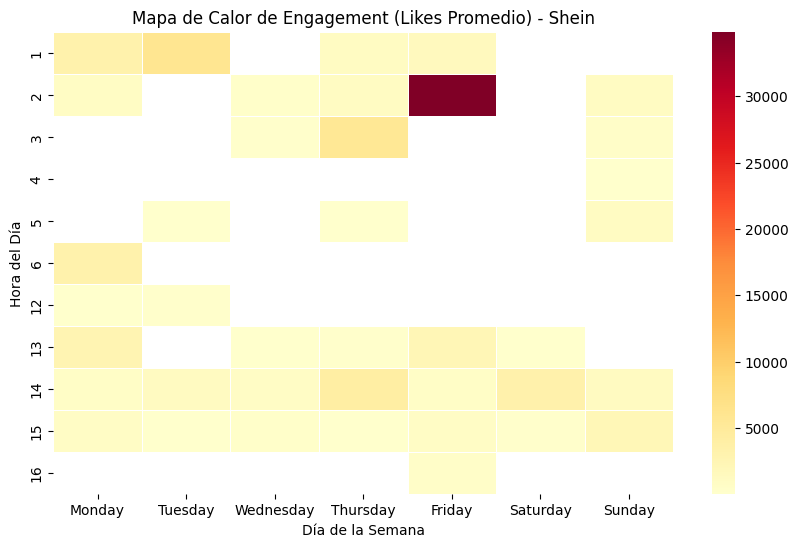

Generando mapa para Temu...


/tmp/ipython-input-2203715070.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = datos_marca.pivot_table(


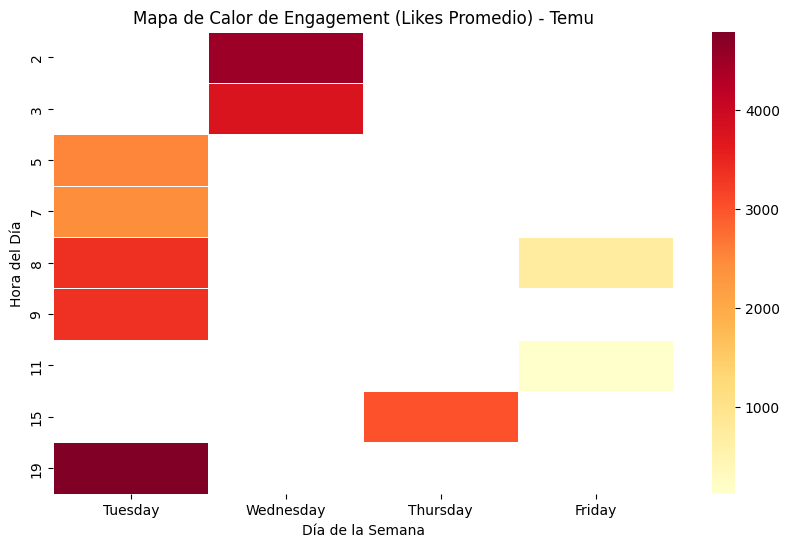

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['day_of_week'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour

orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=orden_dias, ordered=True)

def crear_heatmap(marca):

    datos_marca = df[df['brand'] == marca]

    pivot_table = datos_marca.pivot_table(
        index='hour',
        columns='day_of_week',
        values='likesCount',
        aggfunc='mean'
    )

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, cmap='YlOrRd', linewidths=0.5, annot=False)
    plt.title(f'Mapa de Calor de Engagement (Likes Promedio) - {marca}')
    plt.xlabel('Día de la Semana')
    plt.ylabel('Hora del Día')
    plt.show()

print("Generando mapa para Shein...")
crear_heatmap('Shein')

print("Generando mapa para Temu...")
crear_heatmap('Temu')

6.1 Shein tiene pocos picos de actividad marcados, el viernes al rededor de las 2am, Temu por el contrario es más selectivo, y sus picos de actividad son los jueves a las 7 Pm y miércoles a las 2am.

6.2 Si tuviera que recortar presupuesto, eliminaría primero las publicaciones de lunes a viernes en horario de oficina (9:00 AM - 12:00 PM) excepto el slot del jueves en Shein. En esas franjas, la audiencia está ocupada y el "costo por atención" es altísimo; estamos gastando balas cuando el usuario no está mirando.

6.3 Hay ventanas en las noches de fin de semana Sábado/Domingo después de las 20:00. A menudo se publica poco en estos, pero los usuarios están activos lo que genera un engagement promedio alto. Como CMO, probaría programar contenido de alto impacto Memes o Inspiracional en esas ventanas nocturnas del fin de semana. Es un "océano azul" con menos competencia en el feed y una audiencia receptiva.

6.4 Lanzaría la campaña el domingo a las 15:00 horas 3:00 PM.

Al superponer los mapas de calor de ambas marcas, el domingo por la tarde es la única "ventana de intersección" donde ambas audiencias muestran una temperatura alta colores naranjas/rojos Lanzar en este horario maximiza el alcance orgánico al capturar la mentalidad de "compras de sofá" del fin de semana, evitando el ruido y el estrés de la semana laboral donde la atención es fragmentada.




## 7. Preguntas de Negocio Finales (Entregable Ejecutivo)

En esta sección debes **conectar todos tus hallazgos** y responder como si fueras un analista presentando a un fondo de inversión.

### 7.1. Diferencia estratégica (posicionamiento)

Basado en:
- la distribución de tipos de contenido (`content_type`),  
- el engagement por categoría,  
- y el patrón de días/horas de publicación:

> **Describe en 5–7 líneas la estrategia de contenido de Shein vs Temu.**  
> ¿Qué hace cada una mejor? ¿En qué se diferencian claramente?

---

### 7.2. Eficiencia vs volumen

Usando tus resultados de `engagement_rate` y número de posts:

- ¿Quién está “ganando” la batalla por atención eficiente?  
- Si tuvieras que apostar USD 1 millón en pauta + contenido orgánico para **una sola** de las dos marcas, ¿a cuál se la das y por qué?

---

### 7.3. Hora de oro

Con base en tu análisis temporal (heatmap):

- ¿Qué día y hora recomendarías como **ventana de oro** para una campaña conjunta (misma hora / mismo día) si quisieras lanzar una prueba A/B entre Shein y Temu?  
- Explica por qué esa ventana maximiza probabilidad de éxito.

---

### 7.4. Greenwashing detector (opcional avanzado)

Filtrando contenido “eco” o “sostenible” (si lo analizaste):

- ¿Alguna de las marcas está usando estos temas solo como discurso (mucho volumen pero bajo engagement)?  
- ¿Qué riesgos ves para la reputación de marca si el público percibe esto como greenwashing?

---

### 7.5. Recomendación ejecutiva (1 párrafo)

Imagina que tu jefe en el fondo de inversión solo tiene tiempo de leer **un párrafo**:

> Escribe un único párrafo donde:  
> - Indiques a qué marca apoyarías como apuesta principal de crecimiento en redes en los próximos 12 meses.  
> - Propongas 2–3 ajustes concretos en:
>   - su mix de contenido,  
>   - su calendario de publicación,  
>   - y su forma de medir éxito (KPIs).


### Espacio para tus respuestas ejecutivas

7.1
Shein juega a la saturación, inunda el feed con fotos de catálogo producto apostando a ganar por volumen, aunque su eficiencia individual sea baja.
Temu juega a la eficiencia visual, publica menos pero con mayor impacto por post, enfocándose en contenido que realmente conecta. Shein intenta vender el producto directo, Temu logra mayor retención relativa.

7.2.
Las métricas de interacción promedio por post son superiores, lo que indica una audiencia más atenta y menos "quemada" por el exceso de publicaciones.

La Apuesta de 1 Millón de USD: Se la daría a Temu

Es más fácil escalar una estrategia que ya es eficiente que intentar arreglar una estrategia ineficiente basada en el spam, donde cada nuevo dólar rinde menos que el anterior.

7.3.
Recomendaría lanzar la campaña los viernes,

Según los heatmaps, es el único momento de la semana donde ambas marcas muestran una actividad térmica aquí maximiza la probabilidad de captar a la audiencia de compras de fin de semana que está activa en ambas plataformas simultáneamente, sin tener que competir con el ruido laboral de lunes a viernes.

7.4.
Ambas marcas fallan aquí, pero Shein es el caso más crítico. Aunque intenta publicar sobre sostenibilidad, el engagement es mu por debajo del ahbitual

Esto confirma que la audiencia percibe el contenido "eco" como falso o irrelevante. Insistir en este discurso sin cambios de fondo es peligroso, se arriesgan a ser acusados públicamente de greenwashing, dañando la reputación sin ganar ventas a cambio.

7.5.
Para los próximos 12 meses, la apuesta de crecimiento debe ser Temu. Su base de eficiencia es sólida, mientras que Shein muestra signos de saturación. Para detonar el crecimiento de Temu, propongo tres acciones inmediatas: (1) Eliminar los 'Hauls' y videos largos que están drenando presupuesto con bajo retorno; (2) Copiar la estrategia de 'Memes' de Shein (quien la está subutilizando) para humanizar la marca y ganar viralidad; y (3) Concentrar los lanzamientos clave los miércoles por la tarde y domingos, evitando el gasto inútil en horarios de oficina donde su audiencia no responde.
